In [1]:
from google_play_scraper import Sort, reviews
import pandas as pd
import time

import os
import sys
os.environ["TRANSFORMERS_NO_TF"] = "1"

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from data_scraper import ScrapData
from sentiment_analysis import sentimentAnalysis
from Thematic_Analysis import ThematicAnalysis

C:\Users\Specter\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Initialize scraper
scraper = ScrapData()

In [14]:
# App IDs
apps = {
    "CBE": "com.combanketh.mobilebanking",
    "BOA": "com.boa.boaMobileBanking",
    #"Dashen": "com.cr2.amolelight"
}
all_data = []


In [15]:
# Fetch reviews for each app
for app_name, app_id in apps.items():
    print(f"\nFetching reviews for {app_name}...")
    df = scraper.fetch_reviews(app_id, app_name, n_reviews=600)
    print(f"{app_name} - {len(df)} reviews fetched.")
    all_data.append(df)

# Combine all into one DataFrame
Banks_df = pd.concat(all_data, ignore_index=True)


Fetching reviews for CBE...
Fetched 600 unique reviews for CBE
CBE - 600 reviews fetched.

Fetching reviews for BOA...
Fetched 600 unique reviews for BOA
BOA - 600 reviews fetched.


In [16]:

Banks_df.to_csv("../Data/CBE&BOA_reviews_raw.csv", index=False)
print("✅ All reviews saved to 'bank_reviews_raw.csv'")


✅ All reviews saved to 'bank_reviews_raw.csv'


In [25]:
Dashin = pd.read_csv('../Data/Dashen_reviews_raw.csv')
CBE_BOA = pd.read_csv('../Data/CBE&BOA_reviews_raw.csv')
Dashin

,reviewId,userName,content,score,at,app_name
0,2b25348c-1a20-482c-814e-648572cf6dd9,Hayat Abdulahi,best,5,2025-06-05 08:34:06,Dashen
1,21595904-0dbf-4eb3-bb27-98f67bd618ab,Tewodros Tsegayeed,nice application,4,2025-05-27 14:41:03,Dashen
2,b925631c-a63d-48d9-9852-68aed0898c12,gadisa worku,best,5,2025-05-22 23:11:40,Dashen
3,e0f868ee-be62-4ad5-8976-c5e3ee6f1cd9,Surafel Mershu,bast smart bank sistem dashen amole dashen bamk,5,2025-05-17 09:25:53,Dashen
4,b7d8df4f-45dc-44a1-ac3d-85d46177e7b8,Abdulkarim Abdala,best app,5,2025-05-16 16:30:27,Dashen
...,...,...,...,...,...,...
395,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen
396,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen
397,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen
398,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen


In [26]:
# Combine all reviews into a single DataFrame
Banks_df = pd.concat([CBE_BOA, Dashin])

In [27]:
Banks_df.shape

(1600, 6)

In [10]:
Banks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  1600 non-null   object
 1   userName  1600 non-null   object
 2   content   1600 non-null   object
 3   score     1600 non-null   int64 
 4   at        1600 non-null   object
 5   app_name  1600 non-null   object
dtypes: int64(1), object(5)
memory usage: 87.5+ KB


In [29]:
Banks_df['app_name'].value_counts()

app_name
CBE       600
BOA       600
Dashen    400
Name: count, dtype: int64

In [12]:
Banks_df.duplicated().sum()

np.int64(0)

In [13]:
Banks_df.isna().sum()

reviewId    0
userName    0
content     0
score       0
at          0
app_name    0
dtype: int64

In [30]:
# Rename columns
Banks_df = Banks_df.rename(columns={
    'reviewId': 'reviewId',
    'userName': 'userName',
    'content': 'review',
    'score': 'rating',
    'app_name': 'bank',
    'at': 'date'
})

# Select and reorder necessary columns
Banks_df = Banks_df[['reviewId', 'userName', 'review', 'rating', 'bank', 'date']]
#Banks_df['bank'] = app_name
Banks_df['source'] = 'Google Play'


In [19]:
# Normalize dates
Banks_df['date'] = pd.to_datetime(Banks_df['date']).dt.date 

In [31]:
Banks_df = Banks_df[['reviewId', 'userName', 'review', 'rating', 'date', 'bank', 'source']]
Banks_df.to_csv("../Data/Preprocessed_bank_data.csv", index=False)
print(f"Saved preprocessed data to Preprocessed data")

Saved preprocessed data to Preprocessed data


In [18]:
merged_df = pd.read_csv('../Data/Preprocessed_bank_data.csv')
merged_df

,reviewId,userName,review,rating,date,bank,source
0,3e1d37a0-a082-4cb0-912a-8efff072ed3f,Eyayu Ali,20 years,5,2025-06-08 12:04:48,CBE,Google Play
1,a7d1c799-ba53-4a0a-a8d6-c5400a009825,zelalem fekadu,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play
2,64ed5562-1758-4eb8-9291-8b6edc394118,Mossa Yiha,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play
3,d0c05687-ddd4-43fb-95a9-08f6358d80a2,Hussein Seifu,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play
4,811bf820-3529-433a-9b6d-e624fa23a16a,Adonijah,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play
...,...,...,...,...,...,...,...
1595,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen,Google Play
1596,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen,Google Play
1597,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen,Google Play
1598,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen,Google Play


In [19]:
merged_df['bank'].value_counts()

bank
CBE       600
BOA       600
Dashen    400
Name: count, dtype: int64

## Sentiment and Thematic Analysis

## Sentiment Analysis:

We use the distilbert-base-uncased-finetuned-sst-2-english model from HuggingFace

This is a distilled version of BERT fine-tuned for sentiment analysis

It classifies text as POSITIVE/NEGATIVE with a confidence score

We process reviews in batches for efficiency

### VADER-based Sentiment

In [20]:
merged_df['review'] = merged_df['review'].astype(str)
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract year-month for temporal analysis
merged_df['year_month'] = merged_df['date'].dt.to_period('M')

In [21]:
sentiment = sentimentAnalysis(merged_df)

In [22]:
sentiment.analyze_sentiment_vader()

,reviewId,userName,review,rating,date,bank,source,year_month,sentiment_vader
0,3e1d37a0-a082-4cb0-912a-8efff072ed3f,Eyayu Ali,20 years,5,2025-06-08 12:04:48,CBE,Google Play,2025-06,neutral
1,a7d1c799-ba53-4a0a-a8d6-c5400a009825,zelalem fekadu,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play,2025-06,positive
2,64ed5562-1758-4eb8-9291-8b6edc394118,Mossa Yiha,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play,2025-06,neutral
3,d0c05687-ddd4-43fb-95a9-08f6358d80a2,Hussein Seifu,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play,2025-06,positive
4,811bf820-3529-433a-9b6d-e624fa23a16a,Adonijah,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play,2025-06,negative
...,...,...,...,...,...,...,...,...,...
1595,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen,Google Play,2023-03,positive
1596,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen,Google Play,2023-03,positive
1597,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen,Google Play,2023-03,positive
1598,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen,Google Play,2023-03,positive


In [23]:
liis = merged_df.groupby('bank')['sentiment_vader'].value_counts()
liis

bank    sentiment_vader
BOA     positive           253
        neutral            203
        negative           144
CBE     positive           409
        neutral            146
        negative            45
Dashen  positive           252
        neutral            112
        negative            36
Name: count, dtype: int64

In [24]:
merged_df3 = merged_df.groupby('rating')['sentiment_vader'].value_counts()
merged_df3

rating  sentiment_vader
1       negative           166
        neutral            130
        positive            90
2       neutral             25
        negative            19
        positive            17
3       positive            49
        neutral             47
        negative            14
4       positive            77
        neutral             30
        negative             8
5       positive           681
        neutral            229
        negative            18
Name: count, dtype: int64

c:\Users\Specter\Documents\Tenx_Academy\Week-2\Ethiopian-Bank-App-Review\scripts\sentiment_analysis.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='sentiment_vader', order=['positive', 'neutral', 'negative'], palette='Set2')


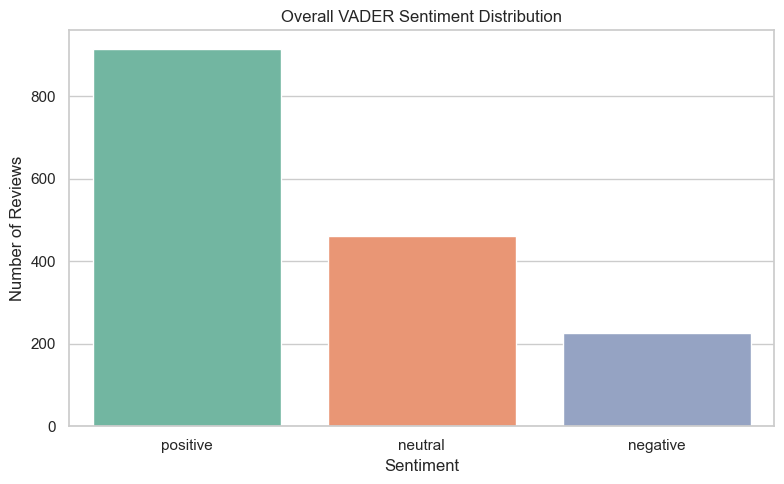

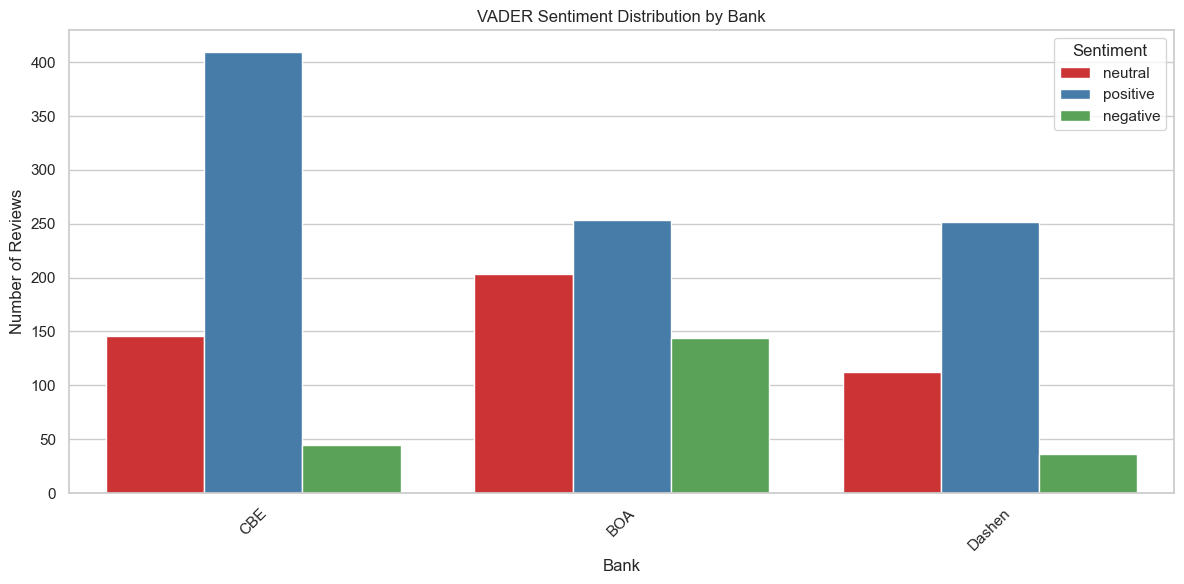

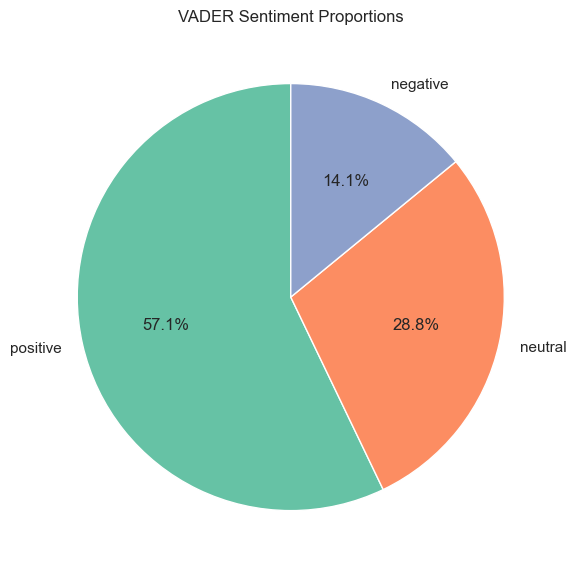

In [25]:
sentiment.visualize_vader_sentiment()

### BERT-based Sentiment (DistilBERT)

In [26]:
sentiment.analyze_sentiment_bert1()

Device set to use cpu


,reviewId,userName,review,rating,date,bank,source,year_month,sentiment_vader,sentiment_bert
0,3e1d37a0-a082-4cb0-912a-8efff072ed3f,Eyayu Ali,20 years,5,2025-06-08 12:04:48,CBE,Google Play,2025-06,neutral,positive
1,a7d1c799-ba53-4a0a-a8d6-c5400a009825,zelalem fekadu,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play,2025-06,positive,positive
2,64ed5562-1758-4eb8-9291-8b6edc394118,Mossa Yiha,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play,2025-06,neutral,positive
3,d0c05687-ddd4-43fb-95a9-08f6358d80a2,Hussein Seifu,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play,2025-06,positive,positive
4,811bf820-3529-433a-9b6d-e624fa23a16a,Adonijah,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play,2025-06,negative,negative
...,...,...,...,...,...,...,...,...,...,...
1595,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen,Google Play,2023-03,positive,positive
1596,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen,Google Play,2023-03,positive,positive
1597,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen,Google Play,2023-03,positive,positive
1598,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen,Google Play,2023-03,positive,positive


In [27]:
sentiment.sentiment_by_bank_and_rating()

,bank,rating,mean_sentiment
0,BOA,1,-0.816092
1,BOA,2,-0.833333
2,BOA,3,-0.116279
3,BOA,4,0.000000
4,BOA,5,0.512000
5,CBE,1,-0.625000
6,CBE,2,-0.523810
7,CBE,3,-0.611111
8,CBE,4,-0.034483
9,CBE,5,0.714964


In [48]:
sentiment.compare_star_rating_with_bert_sentiment()

Classification Report (excluding neutral ratings):

              precision    recall  f1-score   support

    negative       0.64      0.87      0.74       447
    positive       0.94      0.79      0.86      1043

    accuracy                           0.81      1490
   macro avg       0.79      0.83      0.80      1490
weighted avg       0.85      0.81      0.82      1490



,bank,review,rating,sentiment_rating_based,sentiment_bert
0,CBE,20 years,5,positive,positive
1,CBE,A great app. It's like carrying a bank in your...,4,positive,positive
2,CBE,More than garrantty bank EBC.,4,positive,positive
3,CBE,really am happy to this app it is Siple to use...,5,positive,positive
4,CBE,I liked this app. But the User interface is ve...,2,negative,negative
...,...,...,...,...,...
1595,Dashen,Good and reliable service,5,positive,positive
1596,Dashen,"Best app I have ever seen woderfull, always on...",5,positive,positive
1597,Dashen,Good apps,5,positive,positive
1598,Dashen,Good application for people needs,5,positive,positive


In [49]:
merged_d2f = merged_df.groupby('rating')['sentiment_bert'].value_counts()
merged_d2f

rating  sentiment_bert
1       negative          338
        positive           48
2       negative           52
        positive            9
3       negative           67
        positive           43
4       positive           63
        negative           52
5       positive          760
        negative          168
Name: count, dtype: int64

In [28]:
sentiment.analyze_sentiment1()

Device set to use cpu


Performing sentiment analysis...


100%|██████████| 50/50 [01:42<00:00,  2.04s/it]


,reviewId,userName,review,rating,date,bank,source,year_month,sentiment_vader,sentiment_bert,sentiment_score,sentiment_label,sentiment_numeric
0,3e1d37a0-a082-4cb0-912a-8efff072ed3f,Eyayu Ali,20 years,5,2025-06-08 12:04:48,CBE,Google Play,2025-06,neutral,positive,0.991589,POSITIVE,1
1,a7d1c799-ba53-4a0a-a8d6-c5400a009825,zelalem fekadu,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play,2025-06,positive,positive,0.999293,POSITIVE,1
2,64ed5562-1758-4eb8-9291-8b6edc394118,Mossa Yiha,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play,2025-06,neutral,positive,0.997196,POSITIVE,1
3,d0c05687-ddd4-43fb-95a9-08f6358d80a2,Hussein Seifu,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play,2025-06,positive,positive,0.998870,POSITIVE,1
4,811bf820-3529-433a-9b6d-e624fa23a16a,Adonijah,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play,2025-06,negative,negative,0.999684,NEGATIVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen,Google Play,2023-03,positive,positive,0.999866,POSITIVE,1
1596,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen,Google Play,2023-03,positive,positive,0.999634,POSITIVE,1
1597,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen,Google Play,2023-03,positive,positive,0.999861,POSITIVE,1
1598,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen,Google Play,2023-03,positive,positive,0.999709,POSITIVE,1


In [29]:
merged_df.columns

Index(['reviewId', 'userName', 'review', 'rating', 'date', 'bank', 'source',
       'year_month', 'sentiment_vader', 'sentiment_bert', 'sentiment_score',
       'sentiment_label', 'sentiment_numeric'],
      dtype='object')

## Thematic Analysis

In [30]:
Theme = ThematicAnalysis(merged_df)

In [31]:
Theme.extract_themes()

,reviewId,userName,review,rating,date,bank,source,year_month,sentiment_vader,sentiment_bert,sentiment_score,sentiment_label,sentiment_numeric,themes
0,3e1d37a0-a082-4cb0-912a-8efff072ed3f,Eyayu Ali,20 years,5,2025-06-08 12:04:48,CBE,Google Play,2025-06,neutral,positive,0.991589,POSITIVE,1,[other]
1,a7d1c799-ba53-4a0a-a8d6-c5400a009825,zelalem fekadu,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play,2025-06,positive,positive,0.999293,POSITIVE,1,[other]
2,64ed5562-1758-4eb8-9291-8b6edc394118,Mossa Yiha,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play,2025-06,neutral,positive,0.997196,POSITIVE,1,[other]
3,d0c05687-ddd4-43fb-95a9-08f6358d80a2,Hussein Seifu,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play,2025-06,positive,positive,0.998870,POSITIVE,1,[other]
4,811bf820-3529-433a-9b6d-e624fa23a16a,Adonijah,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play,2025-06,negative,negative,0.999684,NEGATIVE,0,[usability]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,70951a6f-26ef-49de-8f9a-39384f78fccc,Anwar Kedir,Good and reliable service,5,2023-03-19 21:52:46,Dashen,Google Play,2023-03,positive,positive,0.999866,POSITIVE,1,[other]
1596,15eb1d2a-87e5-4075-a961-dad92dd0bee7,Dashen Bank Deder Branch,"Best app I have ever seen woderfull, always on...",5,2023-03-19 14:06:24,Dashen,Google Play,2023-03,positive,positive,0.999634,POSITIVE,1,[other]
1597,35ada4ca-0639-478b-b9a5-378ddb3769f7,Behailu Gashaw,Good apps,5,2023-03-19 13:51:25,Dashen,Google Play,2023-03,positive,positive,0.999861,POSITIVE,1,[other]
1598,e331ee97-7303-40b9-a1ed-3fdd48498cb3,Ayanle Awcali,Good application for people needs,5,2023-03-18 23:28:12,Dashen,Google Play,2023-03,positive,positive,0.999709,POSITIVE,1,[other]


In [32]:
analyzer = ThematicAnalysis(merged_df)

In [33]:
# Analyze reviews for each bank
cbe_clusters = analyzer.analyze_bank_reviews('CBE')


Analyzing reviews for CBE...

Top Keywords:
['2025' 'access' 'account' 'add' 'allow' 'amazing' 'app' 'application'
 'apps' 'back' 'bank' 'banking' 'banking app' 'best' 'best app' 'bug'
 'cant' 'cbe' 'cbe app' 'convenient' 'crash' 'developer' 'doesnt' 'dont'
 'download' 'easy' 'easy use' 'ethiopia' 'even' 'ever' 'every' 'excellent'
 'experience' 'fast' 'fix' 'give' 'good' 'good app' 'great' 'great app'
 'issue' 'keep' 'life' 'like' 'love' 'made' 'make' 'mobile'
 'mobile banking' 'money' 'much' 'need' 'network' 'nice' 'nice app' 'ok'
 'old' 'one' 'option' 'payment' 'perfect' 'please' 'please fix' 'problem'
 'really' 'reason' 'reliable' 'save' 'say' 'screen' 'screenshot'
 'screenshots' 'security' 'seen' 'send' 'service' 'simple' 'sometimes'
 'system' 'take' 'thank' 'time' 'transaction' 'transfer' 'update' 'use'
 'used' 'useful' 'user' 'using' 'version' 'week' 'well' 'work' 'working'
 'wow' 'በጣም' 'ነው' 'ግን' 'ጥሩ']

Keyword Clusters:

Other:
2025, account, allow, amazing, app, application, a

In [34]:
BOA_clusters = analyzer.analyze_bank_reviews('BOA')


Analyzing reviews for BOA...

Top Keywords:
['abyssinia' 'account' 'also' 'always' 'android' 'app' 'app doesnt'
 'app ever' 'application' 'apps' 'bad' 'bank' 'banking' 'banking app'
 'best' 'best app' 'better' 'boa' 'bug' 'cant' 'cbe' 'crash' 'customer'
 'day' 'developer' 'developer option' 'didnt' 'disable' 'doesnt'
 'doesnt work' 'dont' 'easy' 'error' 'ethiopia' 'even' 'ever' 'every'
 'excellent' 'experience' 'fix' 'get' 'good' 'good app' 'great' 'im'
 'issue' 'ive' 'keep' 'know' 'like' 'long' 'make' 'mobile'
 'mobile banking' 'money' 'much' 'need' 'never' 'new' 'nice' 'ok' 'one'
 'open' 'option' 'phone' 'please' 'poor' 'problem' 'properly' 'really'
 'say' 'seen' 'service' 'slow' 'sometimes' 'still' 'take' 'thank' 'time'
 'transaction' 'transfer' 'try' 'turn' 'turn developer' 'update' 'use'
 'use app' 'useless' 'user' 'using' 'version' 'work' 'working' 'worst'
 'worst app' 'worst mobile' 'would' 'wow' 'በጣም' 'ነው']

Keyword Clusters:

Other:
abyssinia, account, also, always, android, 

In [35]:
Dashen_clusters = analyzer.analyze_bank_reviews('Dashen')


Analyzing reviews for Dashen...

Top Keywords:
['account' 'always' 'amazing' 'amole' 'amole lite' 'android' 'app'
 'app ever' 'application' 'apps' 'bad' 'bank' 'banking' 'banking app'
 'best' 'best app' 'cant' 'card' 'change' 'customer' 'dashen'
 'dashen bank' 'doesnt' 'doesnt work' 'dont' 'easy' 'easy use' 'ethiopia'
 'even' 'ever' 'every' 'excellent' 'fast' 'fix' 'get' 'go' 'good'
 'good app' 'great' 'improve' 'issue' 'keep' 'last' 'like' 'lite' 'log'
 'login' 'long' 'lot' 'love' 'make' 'many' 'mobile' 'mobile banking'
 'money' 'need' 'new' 'nice' 'nice app' 'ok' 'one' 'open' 'option'
 'passward' 'password' 'payment' 'please' 'problem' 'really' 'receipt'
 'say' 'secure' 'secured' 'security' 'see' 'send' 'service' 'simple'
 'simple use' 'slow' 'star' 'take' 'time' 'transaction' 'transfer' 'tried'
 'try' 'update' 'use' 'use app' 'used' 'user' 'using' 'version' 'way'
 'work' 'working' 'worst' 'wow' 'ነው']

Keyword Clusters:

Other:
account, always, amazing, amole, amole lite, android, a

In [36]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Apply preprocessing
merged_df["clean_review"] = merged_df["review"].apply(analyzer.preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(merged_df["clean_review"])

In [38]:
tfidf_scores = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = tfidf_scores.sum().sort_values(ascending=False).head(20)

In [39]:
# KMeans Clustering (themes per bank)
merged_df["cluster"] = KMeans(n_clusters=5, random_state=42).fit_predict(X)

In [40]:
merged_df['cluster'].value_counts()

cluster
0    1259
1     203
4     101
2      19
3      18
Name: count, dtype: int64

In [42]:
merged_df.columns

Index(['reviewId', 'userName', 'review', 'rating', 'date', 'bank', 'source',
       'year_month', 'sentiment_vader', 'sentiment_bert', 'sentiment_score',
       'sentiment_label', 'sentiment_numeric', 'themes', 'clean_review',
       'cluster'],
      dtype='object')

In [45]:
# Save final results
results_df = merged_df[["reviewId", "review", "clean_review", "sentiment_label", "sentiment_score", "themes", "cluster"]]
results_df.to_csv("../Data/review_analysis_results.csv", index=False)

In [46]:
top_keywords.head(10), results_df.head(5)

(good     221.469665
 app      137.866832
 best      96.193140
 nice      72.894364
 bank      34.670919
 ok        31.189503
 great     28.157414
 work      27.956773
 use       27.405057
 like      26.365824
 dtype: float64,
                                reviewId  \
 0  3e1d37a0-a082-4cb0-912a-8efff072ed3f   
 1  a7d1c799-ba53-4a0a-a8d6-c5400a009825   
 2  64ed5562-1758-4eb8-9291-8b6edc394118   
 3  d0c05687-ddd4-43fb-95a9-08f6358d80a2   
 4  811bf820-3529-433a-9b6d-e624fa23a16a   
 
                                               review  \
 0                                           20 years   
 1  A great app. It's like carrying a bank in your...   
 2                      More than garrantty bank EBC.   
 3  really am happy to this app it is Siple to use...   
 4  I liked this app. But the User interface is ve...   
 
                                 clean_review sentiment_label  sentiment_score  \
 0                                    20 year        POSITIVE         0.991589   